In [1]:
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
TEST_SIZE = 0.2

def saving_results(results, path, file_name):

    results.to_csv(path + file_name,  index = False, sep=";")

def train_model(classifier, X_train_v, X_test_v, y_train, y_test):
    ini = time.time()
    classifier.fit(X_train_v, y_train)
    predictions = classifier.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))

    return timee , acuracia, precision, recall, f1_score, matriz_confusao

def get_tests_result(X_train_v, X_test_v, y_train, y_test):

    all_res = []
    ### MLPClassifier

    #print( "MLPClassifier")
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["MLPClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### AdaBoostClassifier

    #print( "AdaBoostClassifier: ")
    clf = AdaBoostClassifier(n_estimators= 50, learning_rate=1)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["AdaBoostClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### Voting_LR3_SVC1_ETC2
    #print( "Voting_LR3_SVC1_ETC2: ")
    ini = time.time()
    clf2 = LogisticRegression(random_state=0)
    clf5 = SVC(kernel='rbf', probability=True)
    clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[3, 1, 2])
    clf2 = clf2.fit(X_train_v, y_train)
    clf5 = clf5.fit(X_train_v, y_train)
    clf6 = clf6.fit(X_train_v, y_train)
    eclf = eclf.fit(X_train_v, y_train)
    #Y_previsto_vc1 = eclf.predict(X_test_v.toarray())
    Y_previsto_vc1 = eclf.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_previsto_vc1)
    precision = precision_score(y_test, Y_previsto_vc1, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_previsto_vc1)
    recall = recall_score(y_test, Y_previsto_vc1, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_previsto_vc1, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))
    # print(matriz_confusao)
    all_res.append(["Voting_LR3_SVC1_ETC2: ", timee , acuracia, precision, recall, f1_score])



    ### DecisionTreeClassifier
    #print( "DecisionTreeClassifier: ")
    clf = DecisionTreeClassifier(random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["DecisionTreeClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### RandomForestClassifier
    #print( "RandomForestClassifier: " )
    clf = RandomForestClassifier(n_estimators=100, random_state=2)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["RandomForestClassifier: ", timee , acuracia, precision, recall, f1_score])




    ### ExtraTreesClassifier
    #print( "ExtraTreesClassifier: ")
    clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["ExtraTreesClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### LogisticRegression
    #print( "LogisticRegression: ")
    clf = LogisticRegression(random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["LogisticRegression: ",  timee , acuracia, precision, recall, f1_score])



    ### svm
    #print( "svm: ")
    clf = svm.SVC()
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["svm: ",  timee , acuracia, precision, recall, f1_score])



    ### Stacking_scikit
    #print( "Stacking_scikit: ")
    clf1 = RandomForestClassifier(n_estimators=100, random_state=2)
    clf2 = LogisticRegression(random_state=0)
    clf3 = SVC()
    clf4 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    estimators = [('rf', clf1), ('lr', clf2), ('svc', clf3), ('etc', clf4)]
    ini = time.time()
    clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression(), n_jobs=None)
    clf.fit(X_train_v, y_train)
    Y_Previsto_stacking = clf.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_Previsto_stacking)
    precision = precision_score(y_test, Y_Previsto_stacking, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_Previsto_stacking)
    recall = recall_score(y_test, Y_Previsto_stacking, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_Previsto_stacking, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))
    # print(matriz_confusao)
    all_res.append(["Stacking_scikit: ",  timee , acuracia, precision, recall, f1_score])



    ### XGBClassifier
    #print( "XGBClassifier: ")
    #clf = XGBClassifier(eval_metric='mlogloss' )
    #timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    #all_res.append(["XGBClassifier: ",  timee , acuracia, precision, recall, f1_score])



    ### OneVsRestClassifier_RF
    #print( "OneVsRest_RF: ")
    clf = RandomForestClassifier(n_estimators=50, random_state=1)
    ovr = OneVsRestClassifier(clf)
    ini = time.time()
    ovr.fit(X_train_v, y_train)
    Y_Previsto_OVR_RF = ovr.predict(X_test_v)
    fim = time.time()


    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_Previsto_OVR_RF)
    precision = precision_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_Previsto_OVR_RF)
    recall = recall_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))
    # print(matriz_confusao)
    all_res.append(["OvR_RF: ",  timee , acuracia, precision, recall, f1_score])

    return pd.DataFrame( all_res, columns=["ALGORITHM","TIME","ACCURACY","PRECISION","RECALL", "F1_SCORE"])

feat = ['Idade', 'Peso Kg', 'Cor da pele', 'ACTN3',
       'AGT', 'ECA', 'Score Força%', 'Score Resistência %',
       'Pré CK (U/L)', 'Pós CK (U/L)', 'Pré CK MB U/L', 'Pós CK MB U/L',
       'Pré Lactato (mmol/L)', 'Pós Lactato (mmol/L)', 'Pré LDH (U/L)',
       'Pós LDH (U/L)', 'Pré AST (U/L)', 'Pós AST (U/L)',
       'Pré Albumina (g/dL)', 'Pós Albumina (g/dL)', 'Pré TGP (g/dL)',
       'Pós TGP (g/dL)', 'Pré GGT U/L', 'Pós GGT U/L', 'Pré Ac. Úrico (mg/dL)',
       'Pós Ac. Úrico (mg/dL)', 'Pré TFG   (ml/min/1.73 m2)',
       'Pós TFG   (ml/min/1.73 m2)', 'Pré Ureia mg/dL', 'Pós Ureia mg/dL',
       'Pré creatinina mg/dL', 'Pós creatinina mg/dL',
       'Delta CREATININA mg/dL', 'Pré Fósforo mg/dL', 'Pós Fósforo mg/dL',
       'Pré Proteína Total (g/dL)', 'Pós Proteína Total (g/dL)',
       'Pré FE (ug/dL)', 'Pós FE (ug/dL)', 'Pré calcio mg/dL',
       'Pós calcio mg/dL', 'Pré Potássio mmol/L', 'Pós Potássio mmol/L',
       'Glicose pré', 'Glicose pós', 'Pré Sódio mmol/L', 'Pós Sódio mmol/L',
       'Pré Magnésio mg/dL', 'Pós Magnésio mg/dL', 'Pré Cloro mmol/L',
       'Pós Cloro mmol/L',
       'Osmolalidade sérica PRÉ BD4(mOsm/kg): 1,86(Na + K) + 1,15(Gli /18) + (Ureia/6) + 14\t\t\t',
       'Osmolalidade sérica PÓS BD4(mOsm/kg): 1,86(Na + K) + 1,15(Gli /18) + (Ureia/6) + 14\t\t\t',
       'Pré RCB 10^6/mm³', 'Pós RCB 10^6/mm³', 'Pré HGB g/dL', 'Pós HGB g/dL',
       'Pré HCT %', 'Pós HCT %', 'Pré MCV fL', 'Pós MCV fL', 'Pré MCH pg',
       'Pós MCH pg', 'Pré MCHC g/dL', 'Pós MCHC g/dL', 'Pré PLT 10³/mm³',
       'Pós PLT 10³/mm³', 'Pré RDW %', 'Pós RDW %', 'Pré RET %', 'Pós RET %',
       'Pré WBC 10³/mm³', 'Pós WBC 10³/mm³', 'Pré NEUT %', 'Pós NEUT %',
       'Pré LINF %', 'Pós LINF %', 'Pré MONO %', 'Pós MONO %', 'Pré EOS %',
       'Pós EOS %', 'Pré BASO %', 'Pós BASO %', 'massa magra', 'MCT KG', 'ESTATURA', 'vo2max estimado',
       'Handgrip     Dom.', 'Handgrip Cont.', '% gordura']

label_rabdomiolise = "Rabdomiólise"
label_lesao = "Lesão Renal Aguda"




In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/'
file = 'dados.xlsx'
DATASET = pd.read_excel(path + file)

#dropando colunas "inúteis"
DATASET = DATASET.drop(columns=['Ano','Missão','Aluno'])

#No excel por algum motivo todas as colunas numéricas exeto 'ACTN3','AGT','ECA' e 'BDKRB2' estão como categóricas, então temos que passá-las para numericas
for coluna in DATASET.columns:
    if coluna == 'ACTN3' or coluna == 'AGT' or coluna == 'ECA' or coluna == 'BDKRB2':
        continue
    if DATASET[coluna].dtype == 'object':
        DATASET[coluna] = pd.to_numeric(DATASET[coluna], errors='coerce')


DATASET


Mounted at /content/drive


Idade  Peso Kg  Cor da pele ACTN3  AGT  ECA   BDKRB2  Score Força%  \
0     33.0     88.0          1.0    XX   MT   ID  (-9,-9)          25.0   
1     26.0     74.0          1.0    RR   MT   II  (+9,-9)          50.0   
2     26.0     76.0          1.0    RX   MM   ID  (+9,+9)          50.0   
3     25.0     84.0          1.0    RR   TT   DD  (+9,-9)           NaN   
4     33.0     82.0          1.0    RR   MT   II  (+9,-9)          50.0   
..     ...      ...          ...   ...  ...  ...      ...           ...   
462   29.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
463   27.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
464   28.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
465   29.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
466   29.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   

     Score Resistência %  Pré CK (U/L)  ...  Pós BASO %  Lesão Renal Aguda  \
0                   75.0         337.0  ...         0.1              False   
1                   50.0         687.0  ...         0.2              False   
2                   50.0         841.0  ...         0.3              False   
3                    NaN         363.0  ...         0.9              False   
4                   50.0         192.0  ...         0.1              False   
..                   ...           ...  ...         ...                ...   
462                  NaN         231.0  ...         NaN              False   
463                  NaN         649.0  ...         NaN              False   
464                  NaN         274.0  ...         NaN              False   
465                  NaN         176.0  ...         NaN              False   
466                  NaN         168.0  ...         NaN              False   

     Rabdomiólise  massa magra  MCT KG  ESTATURA  vo2max estimado  \
0           False        75.52    84.3     181.5            50.85   
1            True        69.49    75.9     171.0            51.98   
2            True        72.07    79.2     174.0            52.42   
3            True        75.26    84.3     178.0            50.68   
4            True        66.26    79.6     182.0            47.64   
..            ...          ...     ...       ...              ...   
462         False          NaN    82.8     182.0              NaN   
463         False          NaN    75.1     170.0              NaN   
464         False          NaN    82.7     179.5              NaN   
465         False          NaN    80.5     181.0              NaN   
466         False          NaN    85.8     178.0              NaN   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
0                 35.0            37.0      10.05  
1                 42.0            43.0       6.08  
2                 49.5            49.5       8.72  
3                 60.0            57.0      10.61  
4                 51.0            49.0      14.84  
..                 ...             ...        ...  
462               56.0            59.0        NaN  
463               48.0            60.0        NaN  
464               58.0            52.0        NaN  
465               60.0            50.0        NaN  
466               55.0            56.0        NaN  

[467 rows x 93 columns]

**PREPRAÇÃO DOS DADOS**

CASO 1 - Preencher NaN

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


DATASET_fill_mean = DATASET.copy()
DATASET_fill_mean = DATASET_fill_mean.replace('-', np.nan)

# Preencher numéricos com média
imputer_mean = SimpleImputer(strategy='mean')
X_numeric = DATASET_fill_mean.select_dtypes(include=['float64', 'int64'])
DATASET_fill_mean[X_numeric.columns] = imputer_mean.fit_transform(X_numeric)

# Preencher categóricos com moda
imputer_freq = SimpleImputer(strategy='most_frequent')
X_categorical = DATASET_fill_mean.select_dtypes(include=['object', 'category'])
DATASET_fill_mean[X_categorical.columns] = imputer_freq.fit_transform(X_categorical)

X_fill_mean = DATASET_fill_mean.drop(columns=['Rabdomiólise'])
y_fill_mean = DATASET_fill_mean['Rabdomiólise']

X_fm_Train, X_fm_Test, y_fm_Train, y_fm_Test = train_test_split(X_fill_mean,y_fill_mean,test_size=TEST_SIZE)

scaler = MinMaxScaler()
X_numeric_train = X_fm_Train.select_dtypes(include=['float64', 'int64'])
X_numeric_test = X_fm_Test.select_dtypes(include=['float64', 'int64'])

X_fm_Train[X_numeric_train.columns] = scaler.fit_transform(X_numeric_train)
X_fm_Test[X_numeric_test.columns] = scaler.transform(X_numeric_test)
X_fm_Train

Idade   Peso Kg  Cor da pele ACTN3 AGT ECA   BDKRB2  Score Força%  \
375  0.820513  0.780632          1.0    RR  MT  ID  (+9,-9)      0.222226   
410  0.871795  0.762846          0.5    RR  MT  ID  (+9,-9)      0.222226   
112  0.692308  0.790514          0.5    RR  MT  ID  (+9,-9)      0.222226   
400  0.692308  0.750000          1.0    RR  MT  ID  (+9,-9)      0.222226   
139  0.794872  0.750988          0.5    XX  MT  ID  (+9,+9)      0.187500   
..        ...       ...          ...   ...  ..  ..      ...           ...   
237  0.743590  0.691700          0.5    XX  MT  DD  (+9,-9)      0.187500   
402  0.743590  0.740119          1.0    RR  MT  ID  (+9,-9)      0.222226   
393  0.717949  0.881423          0.5    RR  MT  ID  (+9,-9)      0.222226   
316  0.641026  0.789526          0.5    XX  TT  ID  (-9,-9)      0.125000   
76   0.717949  0.810277          0.5    RX  MT  ID  (+9,-9)      0.208333   

     Score Resistência %  Pré CK (U/L)  ...  Pré BASO %  Pós BASO %  \
375             0.777886      0.016237  ...    0.151685    0.063592   
410             0.777886      0.010374  ...    0.033708    0.034483   
112             0.777886      0.007104  ...    0.000000    0.000000   
400             0.777886      0.043525  ...    0.062022    0.017241   
139             0.812500      0.009190  ...    0.157303    0.051724   
..                   ...           ...  ...         ...         ...   
237             0.812500      0.005863  ...    0.078652    0.120690   
402             0.777886      0.013024  ...    0.146067    0.063592   
393             0.777886      0.006596  ...    0.062022    0.034483   
316             0.875000      0.055083  ...    0.017447    0.034483   
76              0.791667      0.022213  ...    0.000000    0.000000   

     Lesão Renal Aguda  massa magra    MCT KG  ESTATURA  vo2max estimado  \
375              False     0.830260  0.718049  0.922078         0.837956   
410              False     0.830260  0.794146  0.927273         0.837956   
112              False     0.792956  0.803902  0.872727         0.879986   
400               True     0.830260  0.732683  0.883117         0.837956   
139              False     0.828534  0.765854  0.901299         0.914225   
..                 ...          ...       ...       ...              ...   
237              False     0.758448  0.711220  0.875844         0.856689   
402              False     0.830260  0.729756  0.981818         0.837956   
393              False     0.830260  0.888780  0.942857         0.837956   
316              False     0.866016  0.780488  0.922078         0.000000   
76               False     0.924679  0.822439  0.987013         0.853159   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
375           0.750000        0.613636   0.528336  
410           0.650000        0.590909   0.528336  
112           0.750000        0.659091   0.726014  
400           0.600000        0.681818   0.528336  
139           0.712500        0.681818   0.447082  
..                 ...             ...        ...  
237           0.625000        0.534091   0.621167  
402           0.661156        0.573914   0.528336  
393           0.875000        0.750000   0.528336  
316           0.525000        0.477273   0.374876  
76            0.681250        0.573864   0.407517  

[373 rows x 92 columns]

CASO 2 - Dropar colunas com 50% mais de NaN e depois dropar linhas com NaN

In [6]:
taxa_drop = 0.5

#Dropando as colunas com valores NULL maiores que taxa_drop
DATASET_drop_cols50 = DATASET.copy()

DATASET_drop_cols50 = DATASET_drop_cols50.loc[:, DATASET_drop_cols50.isnull().mean() < taxa_drop]

DATASET_drop_cols50 = DATASET_drop_cols50.dropna()


#Codificar colunas categóricas
label_encoder = preprocessing.LabelEncoder()
for coluna in DATASET_drop_cols50.select_dtypes(include=['object', 'category']).columns:
    DATASET_drop_cols50[coluna] = label_encoder.fit_transform(DATASET_drop_cols50[coluna].astype(str))

X_drop_cols50 = DATASET_drop_cols50.drop(columns=['Rabdomiólise'])
scale_obj = preprocessing.StandardScaler()
X_drop_cols50 = scale_obj.fit_transform(X_drop_cols50)

y_drop_cols50 = DATASET_drop_cols50['Rabdomiólise']

X_drop_cols50_Train, X_drop_cols50_Test, y_drop_cols50_Train, y_drop_cols50_Test = train_test_split(X_drop_cols50,y_drop_cols50,test_size=TEST_SIZE)


DATASET_drop_cols50

Idade  Peso Kg  Cor da pele  ACTN3  AGT  ECA  BDKRB2  Score Força%  \
0     33.0     88.0          1.0      3    1    1       2          25.0   
1     26.0     74.0          1.0      0    1    2       1          50.0   
2     26.0     76.0          1.0      1    0    1       0          50.0   
4     33.0     82.0          1.0      0    1    2       1          50.0   
5     31.0     92.0          1.0      3    1    1       2         100.0   
..     ...      ...          ...    ...  ...  ...     ...           ...   
338   28.0     87.0          1.0      3    2    0       1          62.5   
339   27.0     78.5          1.0      0    0    0       2          50.0   
340   25.0     85.1          1.0      3    2    1       2          37.5   
342   28.0     85.0          1.0      0    1    1       2          50.0   
343   28.0     81.0          1.0      3    2    0       1          62.5   

     Score Resistência %  Pré CK (U/L)  ...  Pós BASO %  Lesão Renal Aguda  \
0                   75.0         337.0  ...         0.1              False   
1                   50.0         687.0  ...         0.2              False   
2                   50.0         841.0  ...         0.3              False   
4                   50.0         192.0  ...         0.1              False   
5                    0.0         437.0  ...         0.3              False   
..                   ...           ...  ...         ...                ...   
338                 37.5         105.0  ...         3.1              False   
339                 50.0         321.0  ...         0.2              False   
340                 62.5         233.0  ...         0.4              False   
342                 50.0         228.0  ...         0.4              False   
343                 37.5         468.0  ...         1.1               True   

     Rabdomiólise  massa magra  MCT KG  ESTATURA  vo2max estimado  \
0           False        75.52   84.30     181.5            50.85   
1            True        69.49   75.90     171.0            51.98   
2            True        72.07   79.20     174.0            52.42   
4            True        66.26   79.60     182.0            47.64   
5            True        73.99   90.20     184.5            47.05   
..            ...          ...     ...       ...              ...   
338          True        74.20   83.60     175.0            50.56   
339          True        73.39   85.65     177.0            51.46   
340         False        72.78   80.00     177.5             0.00   
342          True        53.70   62.35     169.0            52.58   
343          True        74.20   83.60     175.0            50.56   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
0                 35.0            37.0      10.05  
1                 42.0            43.0       6.08  
2                 49.5            49.5       8.72  
4                 51.0            49.0      14.84  
5                 54.0            47.0      16.90  
..                 ...             ...        ...  
338               54.0            42.0       8.43  
339               48.0            52.0      10.92  
340               42.0            42.0       7.58  
342               44.0            38.0       9.73  
343               54.0            42.0       8.43  

[264 rows x 93 columns]

CASO 3 - fill_mean + transforma texto/categorias em números

In [7]:
DATASET_encoded = DATASET_fill_mean.copy()


label_encoder = preprocessing.LabelEncoder()
for coluna in DATASET_encoded.select_dtypes(include=['object', 'category']).columns:
    DATASET_encoded[coluna] = label_encoder.fit_transform(DATASET_encoded[coluna].astype(str))


X_encoded = DATASET_encoded.drop(columns=['Rabdomiólise'])
y_encoded = DATASET_encoded['Rabdomiólise']


X_encoded_Train, X_encoded_Test, y_encoded_Train, y_encoded_Test = train_test_split(
    X_encoded, y_encoded, test_size=TEST_SIZE)


scaler = preprocessing.StandardScaler()
X_encoded_Train = scaler.fit_transform(X_encoded_Train)
X_encoded_Test = scaler.transform(X_encoded_Test)

colunas_encoded = DATASET_encoded.columns
DATASET_encoded

Idade    Peso Kg  Cor da pele  ACTN3  AGT  ECA  BDKRB2  Score Força%  \
0     33.0  88.000000          1.0      3    1    1       2     25.000000   
1     26.0  74.000000          1.0      0    1    2       1     50.000000   
2     26.0  76.000000          1.0      1    0    1       0     50.000000   
3     25.0  84.000000          1.0      0    2    0       1     56.945274   
4     33.0  82.000000          1.0      0    1    2       1     50.000000   
..     ...        ...          ...    ...  ...  ...     ...           ...   
462   29.0  72.469128          2.0      0    1    1       1     56.945274   
463   27.0  72.469128          2.0      0    1    1       1     56.945274   
464   28.0  72.469128          2.0      0    1    1       1     56.945274   
465   29.0  72.469128          2.0      0    1    1       1     56.945274   
466   29.0  72.469128          2.0      0    1    1       1     56.945274   

     Score Resistência %  Pré CK (U/L)  ...  Pós BASO %  Lesão Renal Aguda  \
0              75.000000         337.0  ...    0.100000              False   
1              50.000000         687.0  ...    0.200000              False   
2              50.000000         841.0  ...    0.300000              False   
3              43.077114         363.0  ...    0.900000              False   
4              50.000000         192.0  ...    0.100000              False   
..                   ...           ...  ...         ...                ...   
462            43.077114         231.0  ...    0.368832              False   
463            43.077114         649.0  ...    0.368832              False   
464            43.077114         274.0  ...    0.368832              False   
465            43.077114         176.0  ...    0.368832              False   
466            43.077114         168.0  ...    0.368832              False   

     Rabdomiólise  massa magra  MCT KG  ESTATURA  vo2max estimado  \
0           False    75.520000    84.3     181.5        50.850000   
1            True    69.490000    75.9     171.0        51.980000   
2            True    72.070000    79.2     174.0        52.420000   
3            True    75.260000    84.3     178.0        50.680000   
4            True    66.260000    79.6     182.0        47.640000   
..            ...          ...     ...       ...              ...   
462         False    69.775015    82.8     182.0        47.478563   
463         False    69.775015    75.1     170.0        47.478563   
464         False    69.775015    82.7     179.5        47.478563   
465         False    69.775015    80.5     181.0        47.478563   
466         False    69.775015    85.8     178.0        47.478563   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
0                 35.0            37.0  10.050000  
1                 42.0            43.0   6.080000  
2                 49.5            49.5   8.720000  
3                 60.0            57.0  10.610000  
4                 51.0            49.0  14.840000  
..                 ...             ...        ...  
462               56.0            59.0  10.682962  
463               48.0            60.0  10.682962  
464               58.0            52.0  10.682962  
465               60.0            50.0  10.682962  
466               55.0            56.0  10.682962  

[467 rows x 93 columns]

In [32]:
from easyfit.classifiers import EasyClassifier
easy_cl = EasyClassifier()
easy_cl.fit(X_encoded,y_encoded)
results_easy_cl = easy_cl.evaluate(X_encoded,y_encoded)
easy_cl.score(X_encoded,y_encoded, as_df=True)

  0%|          | 0/14 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 79%|███████▊  | 11/14 [00:03<00:01,  2.13it/s]/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
100%|██████████| 14/14 [00:03<00:00,  4.06it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Preci

Model     Score
0         DecisionTree Classifier  1.000000
1          RandomForestClassifier  1.000000
2                   MLPClassifier  1.000000
3              AdaBoostClassifier  1.000000
4                       LinearSVC  0.997859
5              LogisticRegression  0.987152
6            KNeighborsClassifier  0.974304
7   QuadraticDiscriminantAnalysis  0.942184
8                   SGDClassifier  0.925054
9                 RidgeClassifier  0.875803
10             RidgeClassifier CV  0.873662
11            GaussianNaive Bayes  0.815846
12        SupportVectorClassifier  0.740899
13                DummyClassifier  0.526767

**SALVANDO METRICAS SEM PCA**


PARA DATASET COM DROP NAS LINHAS COM NAN


In [ ]:
results_drop_cols50 = get_tests_result(X_drop_cols50_Train, X_drop_cols50_Test, y_drop_cols50_Train, y_drop_cols50_Test)
saving_results(results_drop_cols50,
              path + "ResultadosTestesPIBITI/TesteSemPCA/",
              "resultados_rabdomiolise_dropcols.csv")

PARA ENCODED DATASET

In [26]:
results_encoded = get_tests_result(X_encoded_Train, X_encoded_Test, y_encoded_Train, y_encoded_Test)
saving_results(results_encoded,
              path + "ResultadosTestesPIBITI/TesteSemPCA/",
              "resultados_rabdomiolise_encoded.csv")

saving_results(results_easy_cl,
              path + "ResultadosTestesPIBITI/TesteSemPCA/",
              "resultados_rabdomiolise_encoded_EASYCLASSIFIER.csv")

In [29]:
import csv
pca = PCA()
pca.fit(X_encoded_Train)
matriz_covarianca = pca.get_covariance()

with open( path + 'matrizCovarança.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    writer.writerow(colunas_encoded)

    writer.writerows(matriz_covarianca)

print("Arquivo salvo com sucesso!")

Arquivo salvo com sucesso!


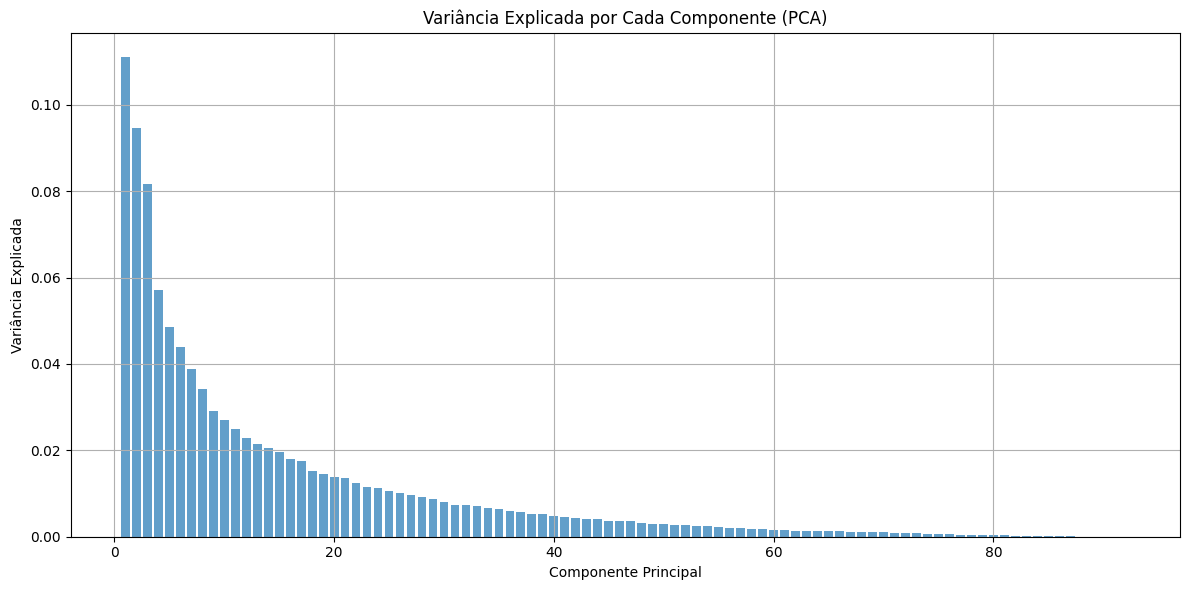

In [34]:
# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Gráfico da variância explicada por componente
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Variância Explicada')
plt.xlabel('Componente Principal')
plt.title('Variância Explicada por Cada Componente (PCA)')
plt.grid(True)
plt.tight_layout()
plt.show()

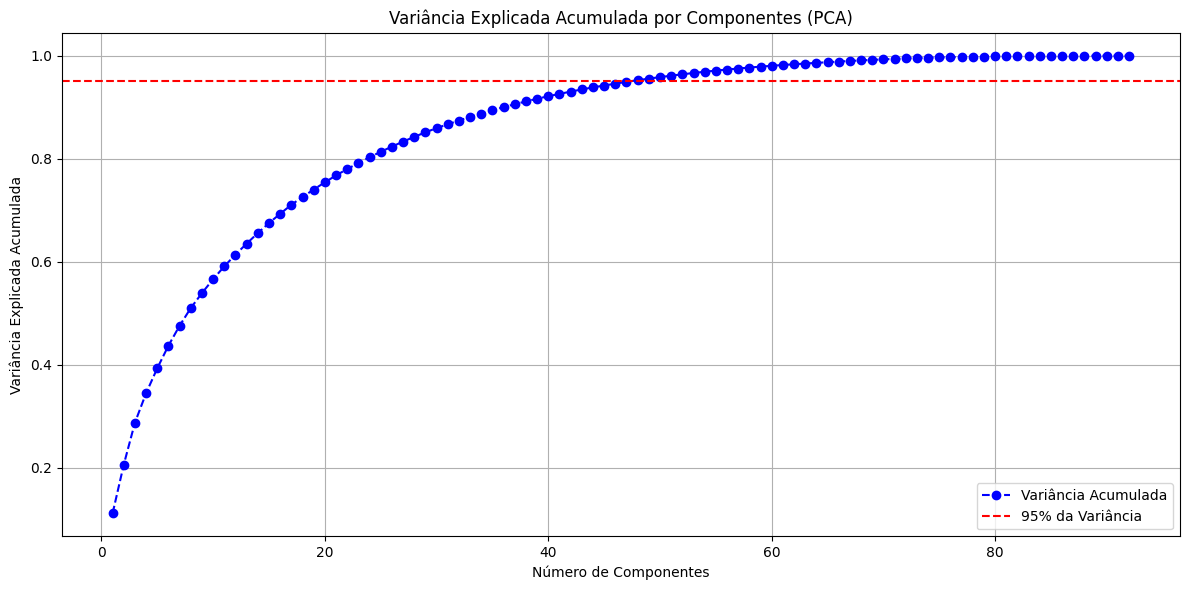

Número de componentes necessários para explicar 95% da variância: 48


In [35]:
# Variância explicada acumulada
cumulative_variance = np.cumsum(explained_variance)

# Gráfico da variância acumulada
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b', label='Variância Acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% da Variância')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Componentes (PCA)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1 #Numero de componentes para explicar pelo menos 95% da variança
print(f"Número de componentes necessários para explicar 95% da variância: {n_components_95}")


In [44]:
#Verificando os coeficientes das variaveis
#Cada linha corresponde a uma componente principal
#Cada coluna corresponde a variavel original do database
loadings = pca.components_.T
feature_names = X_encoded.columns.tolist()


loadings_df = pd.DataFrame(
    data=loadings,
    columns=[f"PC{i+1}" for i in range(len(loadings))],
    index=feature_names
)


loadings_df

PC1       PC2       PC3       PC4       PC5       PC6  \
Idade              0.027826  0.008896  0.065078  0.037969  0.069711  0.057321   
Peso Kg            0.038447  0.030459 -0.038678  0.127262  0.002841  0.172520   
Cor da pele        0.182897 -0.041797  0.011667  0.061844  0.062820  0.168822   
ACTN3              0.027633 -0.010332  0.034469 -0.062853 -0.021413 -0.030209   
AGT               -0.047969  0.018746  0.062788 -0.034223 -0.070945 -0.041789   
...                     ...       ...       ...       ...       ...       ...   
ESTATURA          -0.051914  0.036180 -0.015918  0.219999  0.170464  0.202776   
vo2max estimado   -0.035395  0.003571 -0.023166  0.116008  0.116747  0.080124   
Handgrip     Dom. -0.080683  0.040120  0.045932  0.198446  0.150112  0.194135   
Handgrip Cont.    -0.105166  0.045699  0.018656  0.195840  0.086785  0.153230   
% gordura         -0.037728  0.025054  0.021224  0.085329  0.072092  0.047291   

                        PC7       PC8       PC9      PC10  ...      PC83  \
Idade              0.008472  0.039846  0.068292 -0.052573  ...  0.017181   
Peso Kg            0.104579  0.094747 -0.038483 -0.010622  ...  0.011162   
Cor da pele       -0.123016  0.081114 -0.066660 -0.023338  ... -0.019733   
ACTN3              0.224377 -0.164708  0.053185  0.059317  ...  0.014225   
AGT               -0.020121  0.204325 -0.057026  0.125171  ... -0.006890   
...                     ...       ...       ...       ...  ...       ...   
ESTATURA           0.251338  0.011603 -0.047185  0.098386  ...  0.014625   
vo2max estimado    0.099993  0.011397  0.089077 -0.073886  ... -0.001749   
Handgrip     Dom.  0.137850  0.036669 -0.141965 -0.007077  ...  0.015538   
Handgrip Cont.     0.074401 -0.000121 -0.164088 -0.028774  ... -0.025418   
% gordura          0.135504  0.154245 -0.038932  0.053294  ...  0.003343   

                       PC84      PC85      PC86      PC87      PC88      PC89  \
Idade             -0.004437 -0.002612 -0.006783 -0.000913 -0.000138 -0.002076   
Peso Kg           -0.013422  0.010262  0.000479  0.001273  0.004842  0.006588   
Cor da pele        0.009646  0.011302  0.001641 -0.008461 -0.005959 -0.000037   
ACTN3             -0.001989 -0.022059  0.003803 -0.004494 -0.007177 -0.001834   
AGT                0.008459  0.012857  0.000088 -0.006871 -0.003819  0.005629   
...                     ...       ...       ...       ...       ...       ...   
ESTATURA           0.022569  0.001272  0.035016 -0.002857  0.004477 -0.010488   
vo2max estimado   -0.007008 -0.014391  0.008572 -0.019997  0.009203  0.003830   
Handgrip     Dom.  0.021501 -0.016328 -0.006525  0.008234  0.005194  0.003473   
Handgrip Cont.    -0.007337  0.015880 -0.002453 -0.005320 -0.006587  0.001737   
% gordura         -0.036718  0.011793 -0.003146  0.012012 -0.005688 -0.000684   

                       PC90      PC91      PC92  
Idade             -0.003289  0.000038  0.000049  
Peso Kg           -0.000317 -0.000251 -0.000083  
Cor da pele        0.003494  0.000170  0.000182  
ACTN3              0.002196  0.000051  0.000046  
AGT                0.001437 -0.000346 -0.000161  
...                     ...       ...       ...  
ESTATURA           0.003604 -0.001371  0.000013  
vo2max estimado    0.000580  0.000044 -0.000170  
Handgrip     Dom.  0.001750  0.000325 -0.000140  
Handgrip Cont.     0.001175 -0.000756  0.000233  
% gordura         -0.001271  0.000159  0.000418  

[92 rows x 92 columns]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


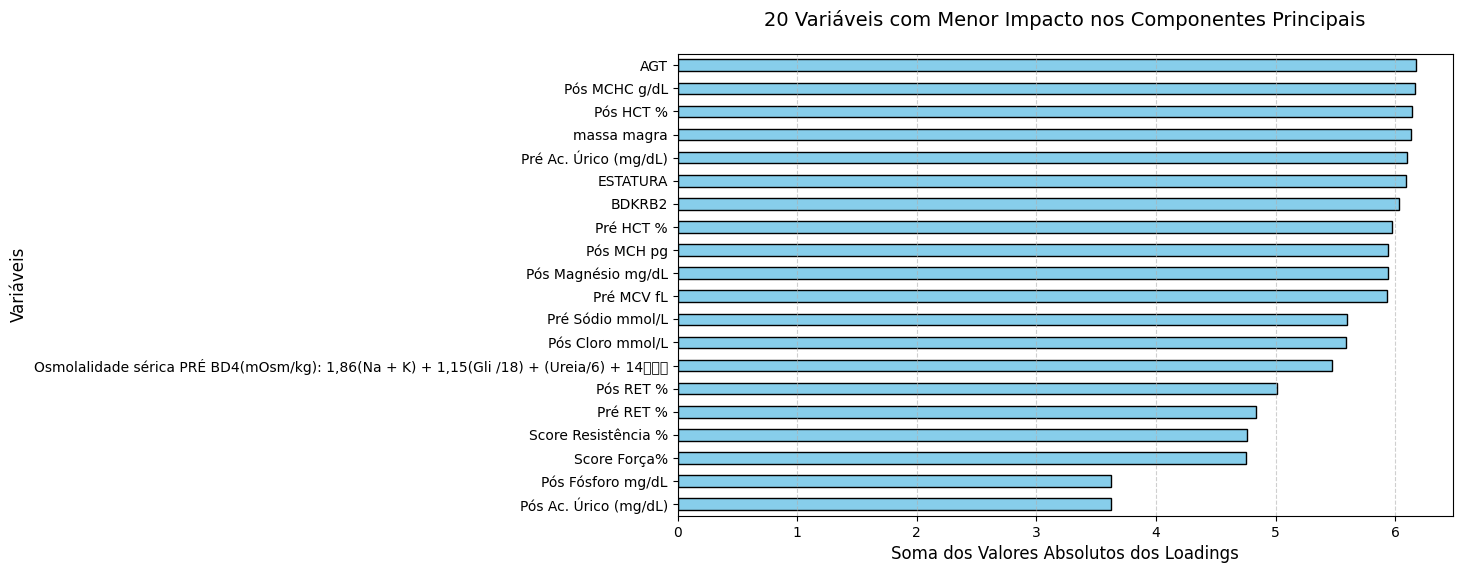

In [58]:
#Grafico das variveis com MENOR soma dos coeficientes da matriz loadings
loadings_df['total_contribution'] = np.abs(loadings).sum(axis=1)
loadings_df['total_contribution'].sort_values().head(20).plot.barh(
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black'
)

plt.xlabel('Soma dos Valores Absolutos dos Loadings', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.title('20 Variáveis com Menor Impacto nos Componentes Principais', fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


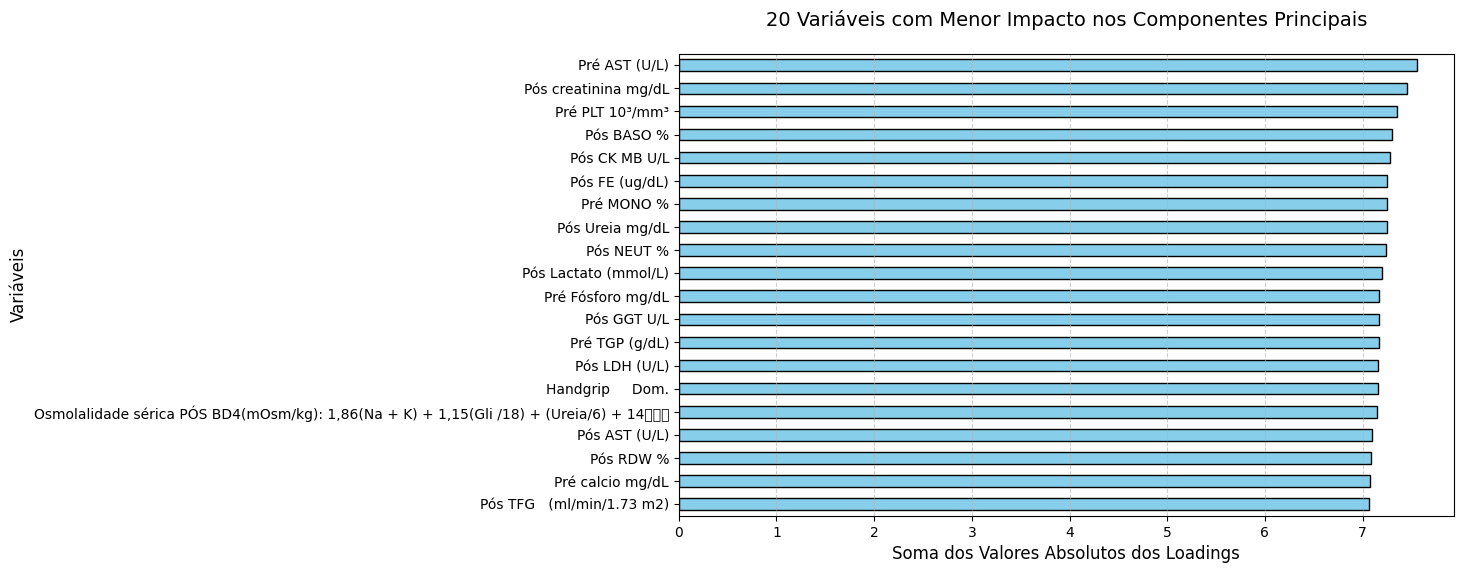

In [59]:
#Grafico das variveis com MAIOR soma dos coeficientes da matriz loadings
loadings_df['total_contribution'].sort_values().tail(20).plot.barh(
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black'
)

plt.xlabel('Soma dos Valores Absolutos dos Loadings', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.title('20 Variáveis com Menor Impacto nos Componentes Principais', fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

In [47]:
#Soma ponderada pela variância explicada de cada PC
#Aqui estamos multiplicando o coeficiente pelo peso que o PC explica a variança
explained_variance = pca.explained_variance_ratio_
loadings_df['weighted_contribution'] = np.abs(loadings) @ explained_variance
loadings_df['weighted_contribution']

Idade                0.072472
Peso Kg              0.077045
Cor da pele          0.081675
ACTN3                0.077450
AGT                  0.077713
                       ...   
ESTATURA             0.073236
vo2max estimado      0.077700
Handgrip     Dom.    0.084822
Handgrip Cont.       0.081058
% gordura            0.078622
Name: weighted_contribution, Length: 92, dtype: float64

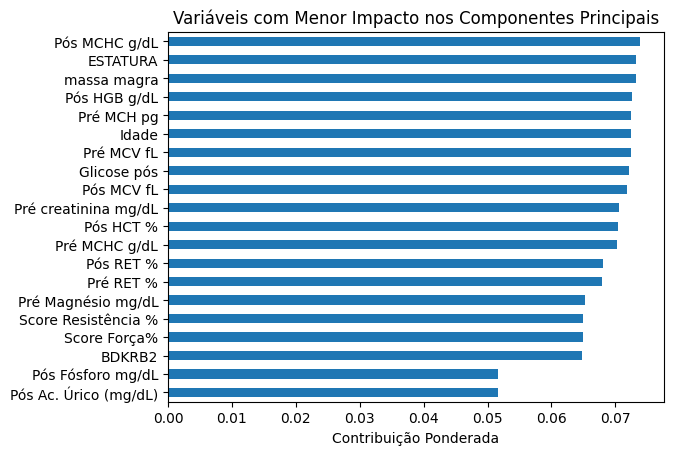

In [49]:
# Gráfico das variáveis menos relevantes, utilizando a metrica com ponderação
loadings_df['weighted_contribution'].sort_values().head(20).plot.barh()
plt.xlabel('Contribuição Ponderada')
plt.title('Variáveis com Menor Impacto nos Componentes Principais')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


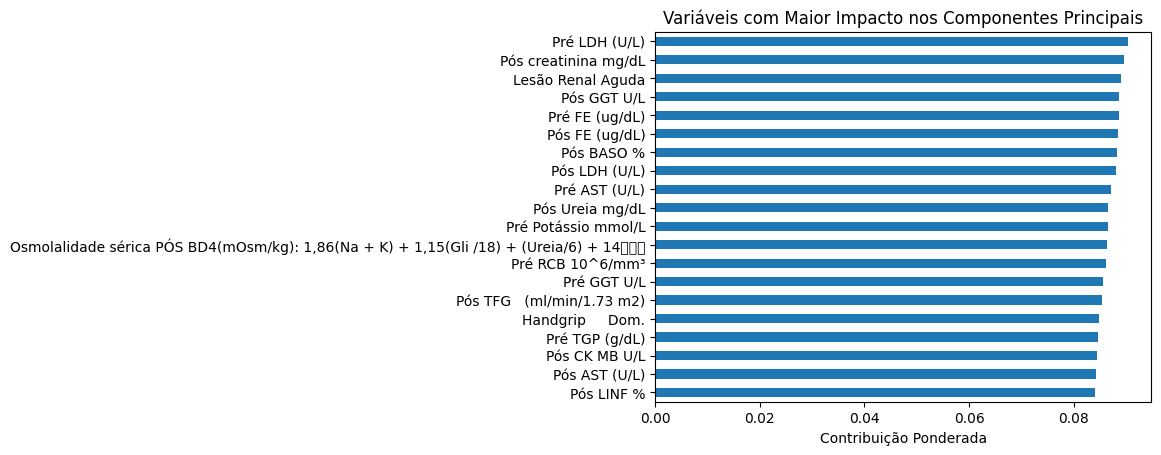

In [53]:
#Grafico das variáveis mais relevantes, utilizando a metrica com ponderação
loadings_df['weighted_contribution'].sort_values().tail(20).plot.barh()
plt.xlabel('Contribuição Ponderada')
plt.title('Variáveis com Maior Impacto nos Componentes Principais')
plt.show()

<ipython-input-43-540270776>:24: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-43-540270776>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


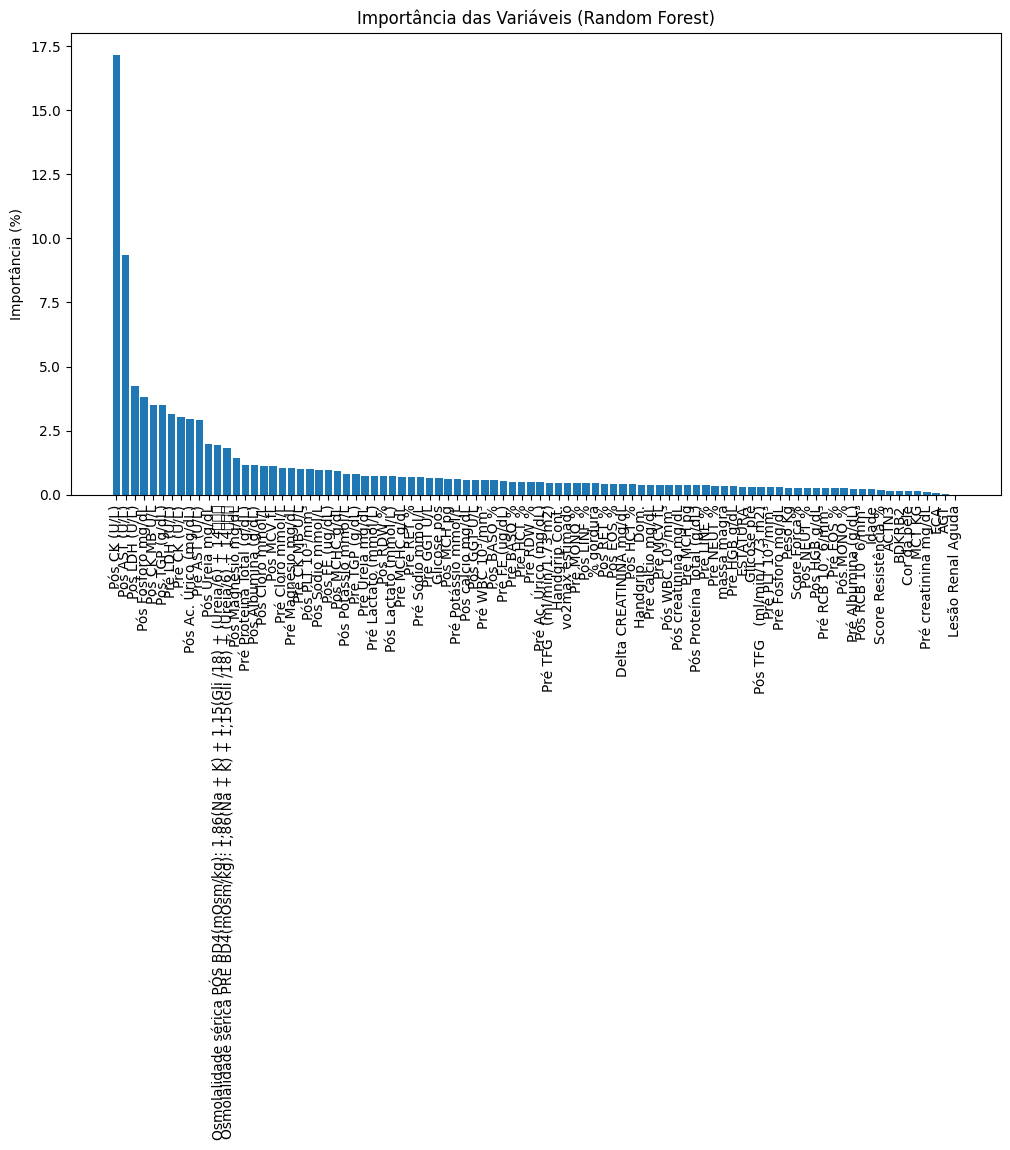

In [ ]:
#Utilizando a feature importance do RandomForest paraver a importancia de cada variavel para prever rabdomiolise

def plot_feature_importance(X_train, y_train, feature_names, top_n, name):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    importances = model.feature_importances_

    if top_n is None:
        top_n = len(importances)

    # Índices ordenados pelas importâncias
    indices = np.argsort(importances)[::-1][:top_n]

    # Normaliza as importâncias em porcentagem
    importances_percent = importances[indices] * 100


    plt.figure(figsize=(12, 6))
    plt.title("Importância das Variáveis (Random Forest)")
    plt.bar(range(top_n), importances_percent, align='center')
    plt.xticks(range(top_n), [feature_names[i] for i in indices], rotation=90)
    plt.ylabel("Importância (%)")
    plt.tight_layout()
    plt.show()


    importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance (%)': importances_percent
    })


    importance_df.to_csv(path + name, index=False, sep=";")

plot_feature_importance(X_encoded_Train, y_encoded_Train, X_encoded.columns, X_encoded.shape[1],"importancia_variaveis_encode.csv")

**APLICANDO PCA NOS DADOS**

In [ ]:
# NUMBER_COMPONENTS = X_encoded_Train.shape[1]

# import copy
# # Guarda cópias dos dados originais
# X_drop_cols50_Train_original = copy.deepcopy(X_drop_cols50_Train)
# X_drop_cols50_Test_original = copy.deepcopy(X_drop_cols50_Test)
# X_encoded_Train_original = copy.deepcopy(X_encoded_Train)
# X_encoded_Test_original = copy.deepcopy(X_encoded_Test)


# metric_column = "PRECISION"  #Posso escolher qualquer métrica para salvar como melhores metricas: "ACCURACY", "PRECISION", "RECALL", "F1_SCORE"

# # Dicionários para armazenar os melhores resultados por algoritmo
# best_dropcols_results = {}  # Formato: {algoritmo: {"score": valor, "components": n, "results": dataframe_row}}
# best_encoded_results = {}

# # Verifica e imprime os shapes originais
# print("Shapes originais:")
# print(f"X_drop_cols50_Train: {X_drop_cols50_Train_original.shape}")
# print(f"X_encoded_Train: {X_encoded_Train_original.shape}")

# # Determina o número máximo de componentes possíveis para cada conjunto de dados
# max_components_dropcols = min(X_drop_cols50_Train_original.shape[0], X_drop_cols50_Train_original.shape[1])
# max_components_encoded = min(X_encoded_Train_original.shape[0], X_encoded_Train_original.shape[1])
# print(f"Máximo de componentes possíveis para dropcols: {max_components_dropcols}")
# print(f"Máximo de componentes possíveis para encoded: {max_components_encoded}")


# for i in range(1, NUMBER_COMPONENTS):
#     print(f"\n===== Processando com {i} componentes =====")

#     try:
#         # Para X_drop_cols50
#         if i <= max_components_dropcols:

#             pca_drop = PCA(n_components=i)
#             X_drop_cols50_Train_pca = pca_drop.fit_transform(X_drop_cols50_Train_original)
#             X_drop_cols50_Test_pca = pca_drop.transform(X_drop_cols50_Test_original)

#             print(f"PCA aplicado com sucesso em X_drop_cols50: resultado shape = {X_drop_cols50_Train_pca.shape}")


#             results_dropcols_df = get_tests_result(X_drop_cols50_Train_pca, X_drop_cols50_Test_pca,
#                                                  y_drop_cols50_Train, y_drop_cols50_Test)


#             saving_results(results_dropcols_df,
#                           path + f"ResultadosTestesPIBITI/TesteComPCA/DROPCOLS/NUMBER_COMPONENTES_{i}_",
#                           "resultados_rabdomiolise_dropcols.csv")


#             for idx, row in results_dropcols_df.iterrows():
#                 algoritmo = row["ALGORITHM"]
#                 current_score = row[metric_column]

#                 #Verificando se o resultado obtido é maior que a melhor metrica até agora
#                 if algoritmo not in best_dropcols_results or current_score > best_dropcols_results[algoritmo]["score"]:
#                     best_dropcols_results[algoritmo] = {
#                         "score": current_score,
#                         "components": i,
#                         "results": row.to_dict()
#                     }
#                     print(f"Novo melhor resultado para dropcols/{algoritmo}: {metric_column}={current_score} com {i} componentes")
#         else:
#             print(f"Pulando PCA para X_drop_cols50: {i} componentes > {max_components_dropcols}")

#         # Para X_encoded
#         if i <= max_components_encoded:

#             pca_encoded = PCA(n_components=i)
#             X_encoded_Train_pca = pca_encoded.fit_transform(X_encoded_Train_original)
#             X_encoded_Test_pca = pca_encoded.transform(X_encoded_Test_original)

#             print(f"PCA aplicado com sucesso em X_encoded: resultado shape = {X_encoded_Train_pca.shape}")


#             results_encoded_df = get_tests_result(X_encoded_Train_pca, X_encoded_Test_pca,
#                                                 y_encoded_Train, y_encoded_Test)


#             saving_results(results_encoded_df,
#                           path + f"ResultadosTestesPIBITI/TesteComPCA/ENCODED/NUMBER_COMPONENTES_{i}_",
#                           "resultados_rabdomiolise_encoded.csv")


#             for idx, row in results_encoded_df.iterrows():
#                 algoritmo = row["ALGORITHM"]
#                 current_score = row[metric_column]


#                 if algoritmo not in best_encoded_results or current_score > best_encoded_results[algoritmo]["score"]:
#                     best_encoded_results[algoritmo] = {
#                         "score": current_score,
#                         "components": i,
#                         "results": row.to_dict()
#                     }
#                     print(f"Novo melhor resultado para encoded/{algoritmo}: {metric_column}={current_score} com {i} componentes")
#         else:
#             print(f"Pulando PCA para X_encoded: {i} componentes > {max_components_encoded}")

#     except Exception as e:
#         print(f"Erro na iteração {i}: {e}")


# print("\n===== Salvando os melhores resultados por algoritmo =====")


# best_dropcols_rows = []
# best_encoded_rows = []

# # Processa os melhores resultados para dropcols
# for algoritmo, info in best_dropcols_results.items():
#     results_dict = info["results"]
#     results_dict["N_COMPONENTS"] = info["components"]
#     best_dropcols_rows.append(results_dict)
#     print(f"Melhor para dropcols/{algoritmo}: {metric_column}={info['score']} com {info['components']} componentes")

# # Processa os melhores resultados para encoded
# for algoritmo, info in best_encoded_results.items():
#     results_dict = info["results"]
#     results_dict["N_COMPONENTS"] = info["components"]
#     best_encoded_rows.append(results_dict)
#     print(f"Melhor para encoded/{algoritmo}: {metric_column}={info['score']} com {info['components']} componentes")

# # Converte para DataFrames
# if best_dropcols_rows:
#     best_dropcols_df = pd.DataFrame(best_dropcols_rows)
#     saving_results(best_dropcols_df,
#                   path + "ResultadosTestesPIBITI/TesteComPCA/",
#                   "MELHORES_POR_ALGORITMO_dropcols.csv")
#     print("Arquivo de melhores resultados para dropcols salvo com sucesso!")
# else:
#     print("Nenhum resultado válido encontrado para dropcols")

# if best_encoded_rows:
#     best_encoded_df = pd.DataFrame(best_encoded_rows)
#     saving_results(best_encoded_df,
#                   path + "ResultadosTestesPIBITI/TesteComPCA/",
#                   "MELHORES_POR_ALGORITMO_encoded.csv")
#     print("Arquivo de melhores resultados para encoded salvo com sucesso!")
# else:
#     print("Nenhum resultado válido encontrado para encoded")